In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Configurações visuais
pd.set_option('display.max_columns', None)
sns.set_theme(style="whitegrid", palette="muted", font_scale=1.1)

In [24]:
# Caminho para o arquivo CSV
file_path = "../data/raw/SpotifyFeatures.csv"

# Carregar os dados
df = pd.read_csv(file_path)

# Ver as primeiras linhas
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,232725.0,41.127502,18.189948,0.00000,29.0000,43.000000,55.0000,100.000
acousticness,232725.0,0.368560,0.354768,0.00000,0.0376,0.232000,0.7220,0.996
danceability,232725.0,0.554364,0.185608,0.05690,0.4350,0.571000,0.6920,0.989
duration_ms,232725.0,235122.339306,118935.909299,15387.00000,182857.0000,220427.000000,265768.0000,5552917.000
energy,232725.0,0.570958,0.263456,0.00002,0.3850,0.605000,0.7870,0.999
instrumentalness,232725.0,0.148301,0.302768,0.00000,0.0000,0.000044,0.0358,0.999
liveness,232725.0,0.215009,0.198273,0.00967,0.0974,0.128000,0.2640,1.000
loudness,232725.0,-9.569885,5.998204,-52.45700,-11.7710,-7.762000,-5.5010,3.744
speechiness,232725.0,0.120765,0.185518,0.02220,0.0367,0.050100,0.1050,0.967
tempo,232725.0,117.666585,30.898907,30.37900,92.9590,115.778000,139.0540,242.903


In [ ]:
# Remover duplicatas (se houver)
print(f"\nAntes: {df.shape[0]} linhas")
df = df.drop_duplicates()
print(f"Depois: {df.shape[0]} linhas")

# Corrigir tipos de dados (garantir que colunas numéricas estejam como float/int)
df = df.convert_dtypes()

# Remover registros com dados faltantes em colunas essenciais
df = df.dropna(subset=['popularity', 'genre', 'danceability', 'energy', 'loudness'])

# Salvar dataset limpo
df.to_csv("../data/processed/SpotifyFeatures_cleaned.csv", index=False)

print("\nLimpeza concluída!")
print(f"Dataset final: {df.shape}")

Valores ausentes por coluna:
genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

Antes: 232725 linhas
Depois: 232725 linhas

Limpeza concluída!
Dataset final: (232725, 18)


---

Abaixo vamos plotar a curva de distribuição da variável de Popularidade

- A variável popularity é a nossa variável-alvo (target), então o primeiro passo é entender como ela se distribui.

- O kde=True (Kernel Density Estimate) desenha uma curva suave sobre o histograma, ajudando a visualizar a forma da distribuição (ex: se é normal, enviesada, etc.).

- O histograma permite ver a forma da distribuição (se é normal, enviesada, bimodal, etc.).

- O boxplot complementa mostrando outliers e dispersão (quartis, mediana, amplitude).

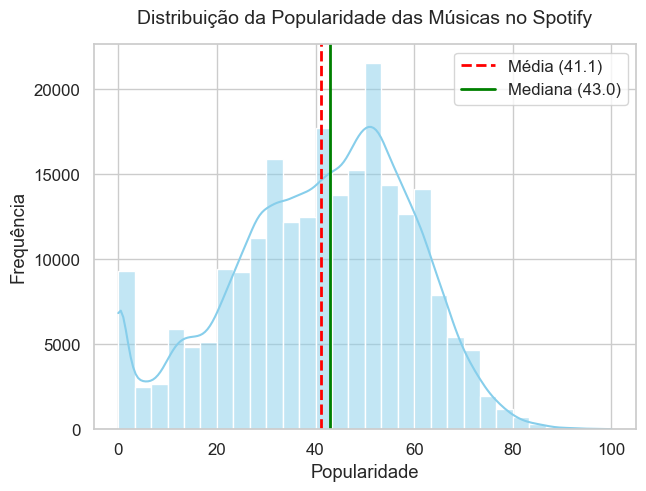

In [18]:
# Histograma da popularidade
plt.figure(figsize=(7,5))
sns.histplot(data=df, x='popularity', bins=30, kde=True, color='skyblue')

# Cálculo das medidas
mean_val = df['popularity'].mean()
median_val = df['popularity'].median()

# Linhas verticais
plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Média ({mean_val:.1f})')
plt.axvline(median_val, color='green', linestyle='-', linewidth=2, label=f'Mediana ({median_val:.1f})')

# Estética
plt.title('Distribuição da Popularidade das Músicas no Spotify', fontsize=14, pad=15)
plt.xlabel('Popularidade')
plt.ylabel('Frequência')
plt.legend()
plt.show()

O que os dados mostram:

- A média (~41) e a mediana (43) estão próximas → distribuição levemente à esquerda (skewness = -0.34).

- Isso indica que a maioria das músicas tem popularidade média a baixa, mas existe uma cauda curta de músicas extremamente populares.

---

Abaixo vamos plotar o heatmap de correlação entre as variáveis numéricas.

Por que usar

- Mostra a correlação linear entre todas as variáveis numéricas.

- Usamos numeric_only=True para evitar erros com colunas não numéricas (como nomes de artistas).

- A função corr() calcula o coeficiente de Pearson, que varia de -1 (inversamente proporcional) a +1 (diretamente proporcional).


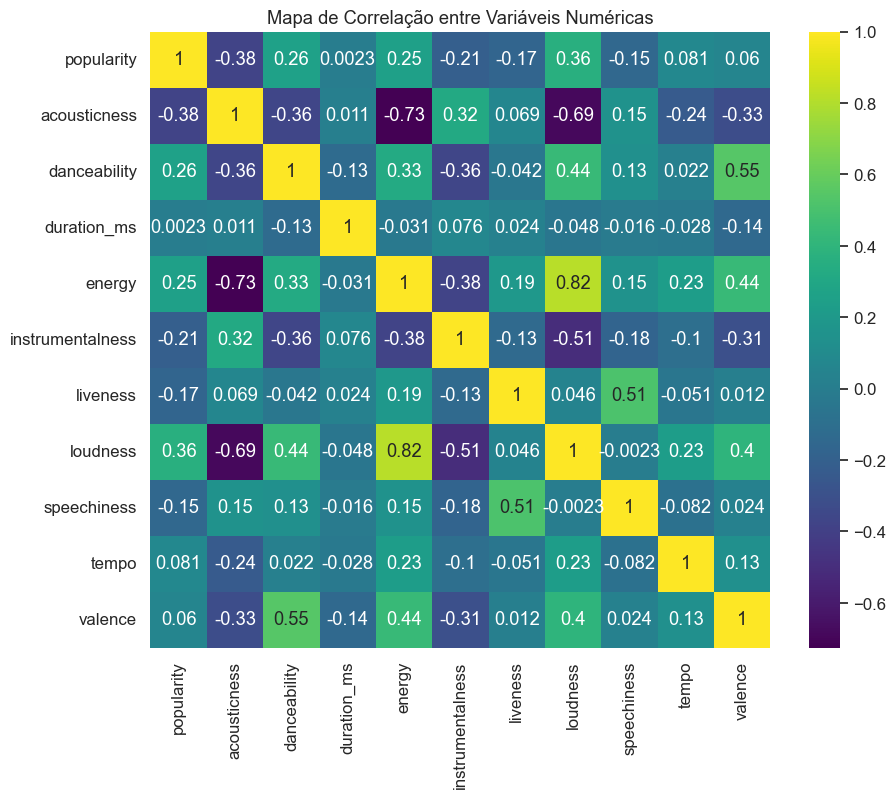

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), cmap='viridis', annot=True)
plt.title('Mapa de Correlação entre Variáveis Numéricas')
plt.show()

---

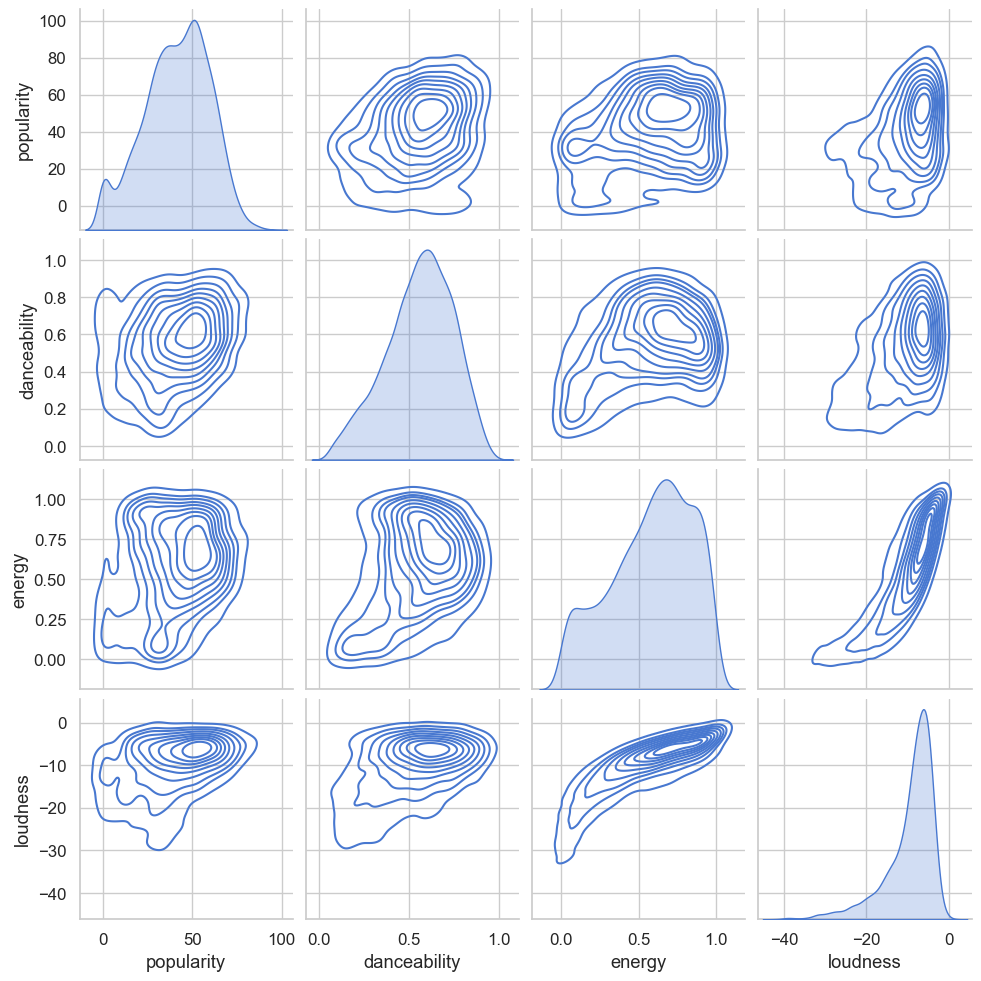

In [9]:
sample_df = df.sample(5000, random_state=42)
sns.pairplot(sample_df, 
             vars=['popularity', 'danceability', 'energy', 'loudness'],
             kind='kde', diag_kind='kde')


O que os dados mostram:

- As variáveis mais correlacionadas positivamente com popularidade são:

    - loudness (0.36)

    - danceability (0.26)

    - energy (0.25)

    - tempo (0.08)

Isso sugere que faixas mais altas, dançantes e energéticas tendem a ser mais populares.

Correlações negativas com instrumentalness e liveness indicam que músicas instrumentais e com performances ao vivo são menos populares.

---

Abaixo vamos plotar o diagrama de caixas para visualizar a distribuição de gêneros por mediana da popularidade, dos top 10 mais e menos populares.

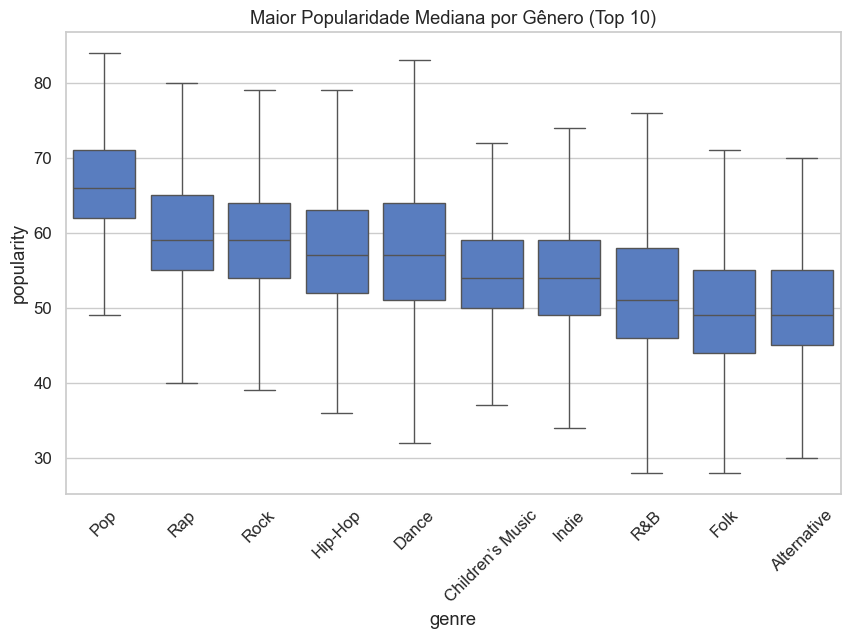

In [10]:
order = (
    df.groupby('genre')['popularity']
      .median()
      .sort_values(ascending=False)
      .head(10)
      .index
)

plt.figure(figsize=(10,6))
sns.boxplot(
    x='genre', 
    y='popularity', 
    data=df[df['genre'].isin(order)],
    order=order,
    showfliers=False
)
plt.xticks(rotation=45)
plt.title('Maior Popularidade Mediana por Gênero (Top 10)')
plt.show()


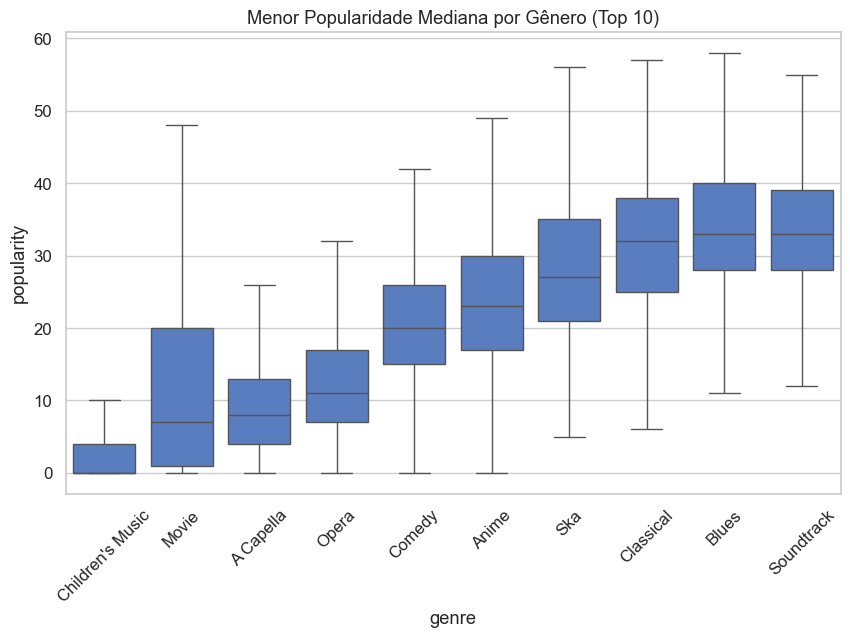

In [11]:
order = (
    df.groupby('genre')['popularity']
      .median()
      .sort_values(ascending=True)
      .head(10)
      .index
)

plt.figure(figsize=(10,6))
sns.boxplot(
    x='genre', 
    y='popularity', 
    data=df[df['genre'].isin(order)],
    order=order,
    showfliers=False
)
plt.xticks(rotation=45)
plt.title('Menor Popularidade Mediana por Gênero (Top 10)')
plt.show()


🧾 Conclusões Parciais - Análise Exploratória
1.	Variáveis com maior correlação com a popularidade
- 	As features loudness, energy e danceability mostraram as maiores correlações positivas com a variável popularity.
-	Isso indica que músicas mais altas, energéticas e dançantes tendem a ter maior popularidade.
-	Esse padrão faz sentido no contexto musical: faixas com maior “energia sonora” e “ritmo dançante” costumam ser mais comerciais e acessíveis ao público.
2.	Distribuição da popularidade
-	A maioria das músicas apresenta popularidade moderada, com poucos exemplos extremamente populares.
-	Isso sugere que o dataset é ligeiramente enviesado para valores médios e baixos, o que pode impactar o balanceamento do modelo preditivo.
3.	Análise por gênero musical
-	Os gêneros Pop, Rap e Rock apresentam as maiores medianas de popularidade, sendo os mais consistentes em termos de sucesso.
-	Outros gêneros, como Children's Music e Movie, mostraram menor popularidade mediana e maior dispersão (ou seja, algumas músicas muito populares e muitas pouco conhecidas).
4.	Próximos passos sugeridos
-	Criar novas features derivadas das mais correlacionadas (ex: normalização de loudness, interação energy × danceability).
-	Iniciar a preparação dos dados para modelagem (Notebook 02_feature_engineering.ipynb).



In [15]:

# === 1. Resumo do target (popularidade) ===
popularity_stats = df['popularity'].describe()
popularity_skew = df['popularity'].skew()

print("📊 DISTRIBUIÇÃO DA POPULARIDADE")
print(popularity_stats)
print(f"Assimetria (skewness): {popularity_skew:.2f}\n")

# === 2. Correlação com Popularidade ===
corr = df.corr(numeric_only=True)['popularity'].sort_values(ascending=False)
print("🔗 CORRELAÇÃO COM POPULARIDADE")
print(corr.head(10), "\n")

# === 3. Mediana da popularidade por gênero ===
genre_median = (
    df.groupby('genre')['popularity']
    .median()
    .sort_values(ascending=False)
)
top_genres = genre_median.head(10)

print("🎶 TOP 10 GÊNEROS POR POPULARIDADE (MEDIANA)")
print(top_genres, "\n")

# === 4. Gêneros mais comuns (para contexto) ===
genre_counts = df['genre'].value_counts().head(10)
print("📦 TOP 10 GÊNEROS MAIS FREQUENTES")
print(genre_counts, "\n")

# === 5. Conclusão textual rápida (opcional) ===
top_corr = corr.head(5).index.tolist()[1:]  # ignora a própria 'popularity'
top_genre_names = top_genres.index.tolist()[:3]

print("🧾 RESUMO:")
print(
    f"As variáveis mais correlacionadas com popularidade são: {', '.join(top_corr)}.\n"
    f"Os gêneros com maior mediana de popularidade são: {', '.join(top_genre_names)}."
)


📊 DISTRIBUIÇÃO DA POPULARIDADE
count    232725.000000
mean         41.127502
std          18.189948
min           0.000000
25%          29.000000
50%          43.000000
75%          55.000000
max         100.000000
Name: popularity, dtype: float64
Assimetria (skewness): -0.34

🔗 CORRELAÇÃO COM POPULARIDADE
popularity          1.000000
loudness            0.363011
danceability        0.256564
energy              0.248922
tempo               0.081039
valence             0.060076
duration_ms         0.002348
speechiness        -0.151076
liveness           -0.167995
instrumentalness   -0.210983
Name: popularity, dtype: float64 

🎶 TOP 10 GÊNEROS POR POPULARIDADE (MEDIANA)
genre
Pop                 66.0
Rap                 59.0
Rock                59.0
Hip-Hop             57.0
Dance               57.0
Children’s Music    54.0
Indie               54.0
R&B                 51.0
Folk                49.0
Alternative         49.0
Name: popularity, dtype: float64 

📦 TOP 10 GÊNEROS MAIS FREQUENTES